In [1]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def beta(x, y, i=90, alpha=0):
    sini = np.sin(i * np.pi / 180)
    cosi = np.cos(i * np.pi / 180)
    return sini * x * (1 - alpha * (sini * y + cosi * np.sqrt(1 - x ** 2 - y ** 2)) ** 2)

In [331]:
def y_of_t(B, i=90, alpha=0, npts=1000):
    """

    
    """
    # Shorthand
    s = np.sin(i * np.pi / 180)
    c = np.cos(i * np.pi / 180)
    a = alpha

    # The curve
    def the_curve(t, S1, S2):
        return S1 / np.sqrt(a * t) * \
        np.sqrt(
            (B / s) - (2 * B * s) + (a * c ** 2 * (1 - t ** 2) * t) -
            (t) + (2 * s ** 2 * t) + (2 * S2 * c) * 
            np.sqrt(
                (B - s * t) * 
                (s * t ** 3 * a + s * t - s * t * a - B)
            )
        )

    # Integration boundaries
    A1 = c * (a * c / (2 * s)) ** (1 / 3) * (
            np.sqrt(
                27 * a * (27 * B ** 2 * a + 4 * s ** 2 / c ** 2 * (1 - c ** 2 * a) ** 3)
            ) - 27 * B * a
        ) ** (1 / 3)
    A3 = (a / (2 * s)) ** (1 / 3) * (
            np.sqrt(
                27 * a * (27 * B ** 2 * a + 4 * s ** 2 * (1 - a) ** 3)
            ) - 27 * B * a
        ) ** (1 / 3)
    A4 = s * (a / 2) ** (1 / 3) * (
            np.sqrt(
                27 * a * (27 * B ** 2 * a + 4 * (1 - s ** 2 * a) ** 3)
            ) + 27 * B * a
        ) ** (1 / 3)
    t1 = (1 - c ** 2 * a) / A1 - A1 / (3 * c ** 2 * a)
    t2 = B / s
    t3 = (1 - a) / A3 - A3 / (3 * a)
    t4 = -(1 - s ** 2 * a) / A4 + A4 / (3 * s ** 2 * a)
    t5 = t4
    
    # The curve, y(t)
    y = np.empty(0)
    t = np.empty(0)
    limits = ([t5, t2], [t2, t1], [t1, t3], [t3, t4])
    signs = ([-1, +1], [-1, -1], [+1, -1], [+1, +1])
    for lims, sgn in zip(limits, signs):
        t_ = np.linspace(lims[0], lims[1], npts)[1:-1]
        y_ = the_curve(t_, sgn[0], sgn[1])
        t = np.append(t, t_)
        y = np.append(y, y_)
    
    return t, y

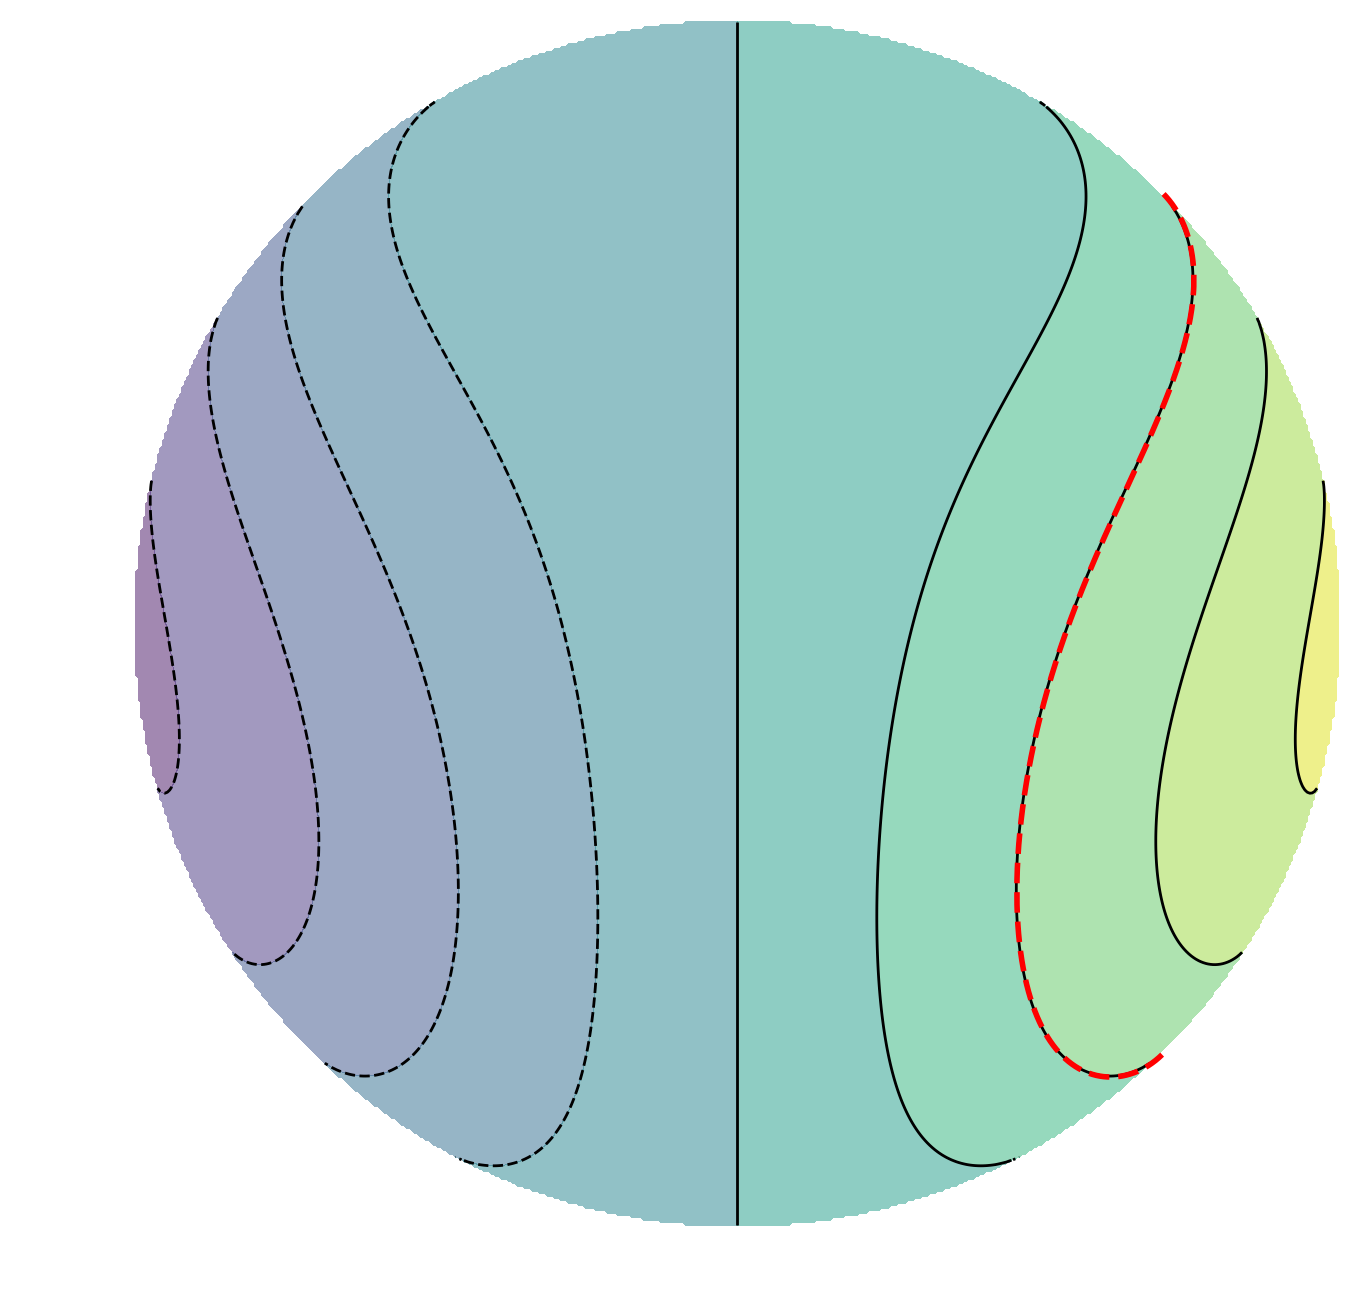

In [334]:
# Grid up the star
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
x, y = np.meshgrid(x, y)
outside = x ** 2 + y ** 2 > 1
x[outside] = np.nan
y[outside] = np.nan

# Compute the Doppler field
B = 0.4
i = 60
alpha = 0.9
f = beta(x, y, i=i, alpha=alpha)

# Plot it
fig = plt.figure(figsize=(8, 8))
plt.contourf(f, origin="lower", alpha=0.5, levels=10, extent=(-1, 1, -1, 1))
plt.contour(f, origin="lower", colors="k", levels=10, linewidths=1, extent=(-1, 1, -1, 1))
plt.gca().set_aspect(1)
plt.gca().axis('off');

# Overplot a line of constant `B` (analytic)
t, y = y_of_t(B, i, alpha)
plt.plot(t, y, "r--", lw=2);